## Vestari

Warning message in geom_hline(data = data.frame(Variable = factor("CO₂ Flux", :
"Ignoring unknown parameters: `inherit.aes`"


[1] "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Vestari_Jokulsa.png"

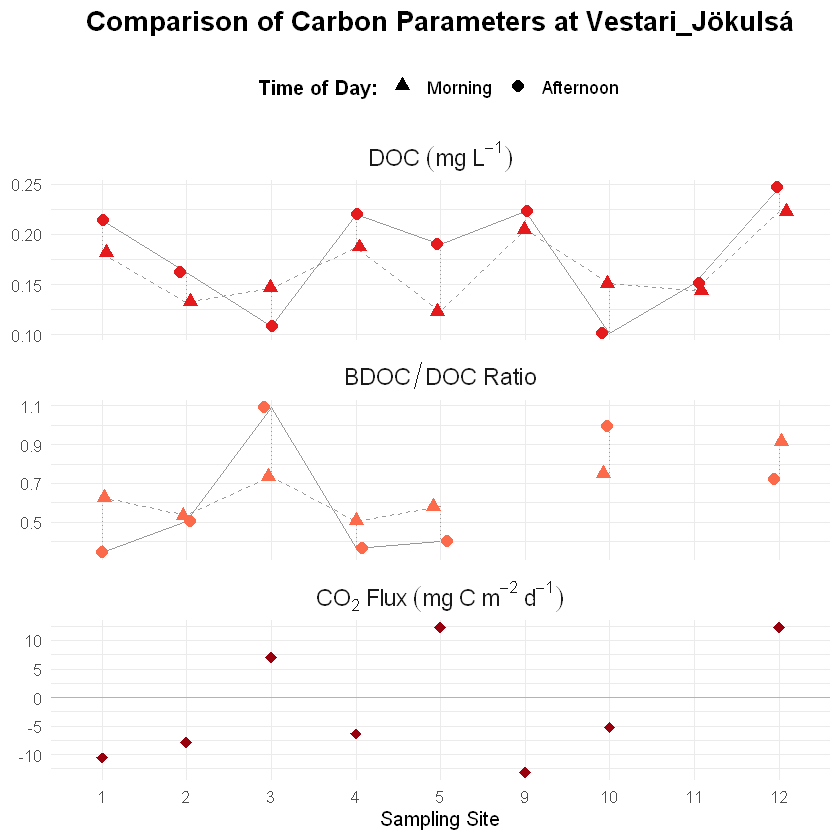

In [39]:
# Pakete
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)

# Daten einlesen
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx",
                 sheet = "FINAL_final_final")

# Vestari-Daten
vestari <- df %>%
  filter(river_name == "Vestari_Joekulsa") %>%
  mutate(label_type = ifelse(grepl("VM", DOC_label), "Morning", "Afternoon"),
         BDOC_DOC_ratio = BDOC / DOC)

# DOC + BDOC
carbon_data <- vestari %>%
  select(site_nr, DOC, BDOC_DOC_ratio, label_type) %>%
  pivot_longer(cols = c(DOC, BDOC_DOC_ratio),
               names_to = "Variable", values_to = "Wert") %>%
  mutate(Variable = recode(Variable,
                           "DOC" = "DOC (mg~L^{-1})",
                           "BDOC_DOC_ratio" = "BDOC / DOC Ratio"),
         site_nr = factor(site_nr))

# Flux Daten
flux_data <- vestari %>%
  distinct(site_nr, CO2_Flux) %>%
  mutate(Variable = "CO₂ Flux", Wert = CO2_Flux,
         site_nr = factor(site_nr),
         label_type = NA)

# Levels fix
var_levels <- c("DOC (mg~L^{-1})", "BDOC / DOC Ratio", "CO₂ Flux")
carbon_data$Variable <- factor(carbon_data$Variable, levels = var_levels)
flux_data$Variable <- factor(flux_data$Variable, levels = var_levels)

# Kombinieren
combined_data <- bind_rows(
  carbon_data %>% select(site_nr, Variable, Wert, label_type),
  flux_data %>% select(site_nr, Variable, Wert, label_type)
)

# Reihenfolge Shapes
combined_data$label_type <- factor(combined_data$label_type, levels = c("Morning", "Afternoon"))

# Vertikale Linien
linien <- carbon_data %>%
  select(site_nr, Variable, Wert, label_type) %>%
  pivot_wider(names_from = label_type, values_from = Wert) %>%
  filter(!is.na(Morning) & !is.na(Afternoon))

# Farben
farben <- c("DOC (mg~L^{-1})" = "#e41a1c",
            "BDOC / DOC Ratio" = "#fb6a4a",
            "CO₂ Flux" = "#99000d")

# Labels
facet_labels <- c(
  "DOC (mg~L^{-1})" = "DOC~(mg~L^{-1})",
  "BDOC / DOC Ratio" = "BDOC / DOC~Ratio",
  "CO₂ Flux" = "CO[2]~Flux~(mg~C~m^{-2}~d^{-1})"
)

# Speicherpfad
save_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Vestari_Jokulsa.png"

# Plot
p <- ggplot(combined_data, aes(x = site_nr, y = Wert)) +
  ggtitle("Comparison of Carbon Parameters at Vestari_Jökulsá") +
  # Null-Linie nur Flux
  geom_hline(data = data.frame(Variable = factor("CO₂ Flux", levels = var_levels)), aes(yintercept = 0),
             color = "grey70", size = 0.4, inherit.aes = FALSE) +
  # Vertikale Linien
  geom_segment(data = linien,
               aes(x = site_nr, xend = site_nr, y = Morning, yend = Afternoon),
               color = "grey60", size = 0.5, linetype = "dotted", inherit.aes = FALSE) +
  # Linien DOC & BDOC
  geom_line(data = carbon_data %>% filter(label_type == "Morning"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "dashed", size = 0.5, inherit.aes = FALSE) +
  geom_line(data = carbon_data %>% filter(label_type == "Afternoon"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "solid", size = 0.5, inherit.aes = FALSE) +
  # Punkte nur DOC & BDOC mit Shapes
  geom_point(data = combined_data %>% filter(Variable != "CO₂ Flux"),
             aes(shape = label_type, color = Variable),
             size = 3, position = position_jitter(width = 0.1), na.rm = TRUE) +
  # Punkte Flux ohne Shapes
  geom_point(data = combined_data %>% filter(Variable == "CO₂ Flux"),
             aes(color = Variable),
             shape = 18, size = 3, na.rm = TRUE) +
  scale_shape_manual(values = c("Morning" = 17, "Afternoon" = 16), na.translate = FALSE) +
  scale_color_manual(values = farben, guide = "none") +
  facet_wrap(vars(Variable), scales = "free_y", ncol = 1, drop = FALSE,
             labeller = as_labeller(facet_labels, label_parsed)) +
  labs(x = "Sampling Site", y = NULL, shape = "Time of Day:") +
  theme_minimal(base_size = 12) +
  theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5, margin = margin(b = 15)),
        strip.text = element_text(size = 14, face = "bold"),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 10),
        legend.position = "top",
        legend.direction = "horizontal",
        legend.title = element_text(size = 12, face = "bold", hjust = 0),
        legend.text = element_text(size = 11),
        legend.spacing.x = unit(0.5, 'cm'),
        legend.justification = "center")

# Plot anzeigen
print(p)

# Speichern
ggsave(filename = save_path, plot = p,
       width = 8.27, height = 11.69, units = "in", dpi = 300)

# Speicherpfad anzeigen
save_path


## Virkisa


Warning message in geom_hline(data = data.frame(Variable = factor("CO₂ Flux", :
"Ignoring unknown parameters: `inherit.aes`"
Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range (`geom_line()`)."
Warning message:
"Removed 2 rows containing missing values or values outside the scale range (`geom_line()`)."


[1] "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Virkisa.png"

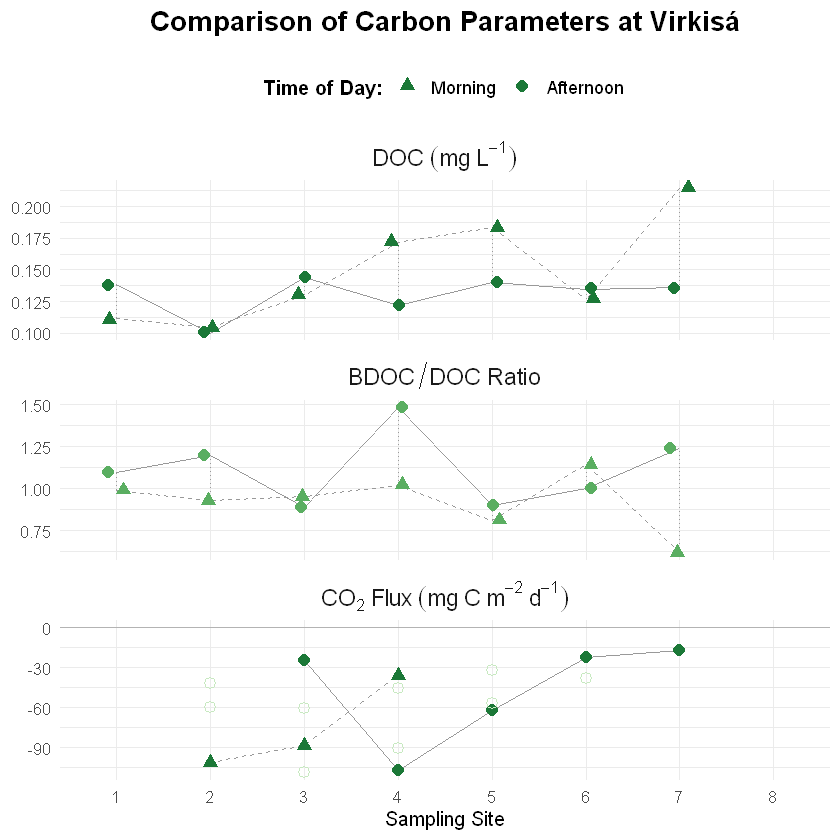

In [43]:
# Pakete
library(readxl)
library(dplyr)
library(ggplot2)
library(tidyr)

# Daten einlesen
df <- read_excel("C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx",
                 sheet = "FINAL_final_final")

# Virkisa DOC & BDOC nur group_nr == 1
virkisa_carbon <- df %>%
  filter(river_name == "Virkisa", group_nr == 1) %>%
  mutate(label_type = ifelse(grepl("VM", DOC_label), "Morning", "Afternoon"),
         BDOC_DOC_ratio = BDOC / DOC)

# Flux alle groups
virkisa_flux <- df %>%
  filter(river_name == "Virkisa") %>%
  mutate(label_type = ifelse(grepl("VM", DOC_label), "Morning", "Afternoon"),
         Flux_group = ifelse(group_nr == 1, "Group 1", "Other Groups")) %>%
  distinct(site_nr, CO2_Flux, group_nr, label_type, Flux_group) %>%
  mutate(Variable = "CO₂ Flux", Wert = CO2_Flux,
         site_nr = factor(site_nr))

# DOC + BDOC ins Long Format
carbon_data <- virkisa_carbon %>%
  select(site_nr, DOC, BDOC_DOC_ratio, label_type) %>%
  pivot_longer(cols = c(DOC, BDOC_DOC_ratio),
               names_to = "Variable", values_to = "Wert") %>%
  mutate(Variable = recode(Variable,
                           "DOC" = "DOC (mg~L^{-1})",
                           "BDOC_DOC_ratio" = "BDOC / DOC Ratio"),
         site_nr = factor(site_nr))

# Levels fix
var_levels <- c("DOC (mg~L^{-1})", "BDOC / DOC Ratio", "CO₂ Flux")
carbon_data$Variable <- factor(carbon_data$Variable, levels = var_levels)
virkisa_flux$Variable <- factor(virkisa_flux$Variable, levels = var_levels)

# Kombinieren
combined_data <- bind_rows(
  carbon_data %>% select(site_nr, Variable, Wert, label_type),
  virkisa_flux %>% select(site_nr, Variable, Wert, label_type, Flux_group)
)

# Reihenfolge Shapes
combined_data$label_type <- factor(combined_data$label_type, levels = c("Morning", "Afternoon"))

# Vertikale Linien
linien <- carbon_data %>%
  select(site_nr, Variable, Wert, label_type) %>%
  pivot_wider(names_from = label_type, values_from = Wert) %>%
  filter(!is.na(Morning) & !is.na(Afternoon))

# Farben
farben <- c("DOC (mg~L^{-1})" = "#1b7837",
            "BDOC / DOC Ratio" = "#5aae61",
            "CO₂ Flux" = "#a6dba0")

# Labels
facet_labels <- c(
  "DOC (mg~L^{-1})" = "DOC~(mg~L^{-1})",
  "BDOC / DOC Ratio" = "BDOC / DOC~Ratio",
  "CO₂ Flux" = "CO[2]~Flux~(mg~C~m^{-2}~d^{-1})"
)

# Speicherpfad
save_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_time/Plot_TimeOfDay_Virkisa.png"

# Plot
p <- ggplot(combined_data, aes(x = site_nr, y = Wert)) +
  ggtitle("Comparison of Carbon Parameters at Virkisá") +
  # Null-Linie nur Flux
  geom_hline(data = data.frame(Variable = factor("CO₂ Flux", levels = var_levels)), aes(yintercept = 0),
             color = "grey70", size = 0.4, inherit.aes = FALSE) +
  # Vertikale Linien
  geom_segment(data = linien,
               aes(x = site_nr, xend = site_nr, y = Morning, yend = Afternoon),
               color = "grey60", size = 0.5, linetype = "dotted", inherit.aes = FALSE) +
  # Linien DOC & BDOC
  geom_line(data = carbon_data %>% filter(label_type == "Morning"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "dashed", size = 0.5, inherit.aes = FALSE) +
  geom_line(data = carbon_data %>% filter(label_type == "Afternoon"),
            aes(x = as.numeric(site_nr), y = Wert, group = Variable),
            color = "grey60", linetype = "solid", size = 0.5, inherit.aes = FALSE) +
  # Linien Flux (nur Group 1)
  geom_line(data = virkisa_flux %>% filter(Flux_group == "Group 1", label_type == "Morning"),
            aes(x = as.numeric(site_nr), y = Wert),
            color = "grey60", linetype = "dashed", size = 0.5, inherit.aes = FALSE) +
  geom_line(data = virkisa_flux %>% filter(Flux_group == "Group 1", label_type == "Afternoon"),
            aes(x = as.numeric(site_nr), y = Wert),
            color = "grey60", linetype = "solid", size = 0.5, inherit.aes = FALSE) +
  # Punkte DOC & BDOC
  geom_point(data = combined_data %>% filter(Variable != "CO₂ Flux"),
             aes(shape = label_type, color = Variable),
             size = 3, position = position_jitter(width = 0.1), na.rm = TRUE) +
  # Flux Punkte Group 1 mit Shape
  geom_point(data = combined_data %>% filter(Variable == "CO₂ Flux", Flux_group == "Group 1"),
             aes(shape = label_type),
             color = "#1b7837", size = 3, na.rm = TRUE) +
  # Flux Punkte andere Gruppen offen
  geom_point(data = combined_data %>% filter(Variable == "CO₂ Flux", Flux_group == "Other Groups"),
             shape = 1, color = "#c7e9c0", size = 3, na.rm = TRUE) +
  scale_shape_manual(values = c("Morning" = 17, "Afternoon" = 16), na.translate = FALSE) +
  scale_color_manual(values = farben, guide = "none") +
  facet_wrap(vars(Variable), scales = "free_y", ncol = 1, drop = FALSE,
             labeller = as_labeller(facet_labels, label_parsed)) +
  labs(x = "Sampling Site", y = NULL, shape = "Time of Day:") +
  theme_minimal(base_size = 12) +
  theme(plot.title = element_text(size = 16, face = "bold", hjust = 0.5, margin = margin(b = 15)),
        strip.text = element_text(size = 14, face = "bold"),
        strip.background = element_blank(),
        axis.text.x = element_text(size = 10),
        legend.position = "top",
        legend.direction = "horizontal",
        legend.title = element_text(size = 12, face = "bold", hjust = 0),
        legend.text = element_text(size = 11),
        legend.spacing.x = unit(0.5, 'cm'),
        legend.justification = "center")

# Plot anzeigen
print(p)

# Speichern
ggsave(filename = save_path, plot = p,
       width = 8.27, height = 11.69, units = "in", dpi = 300)

# Speicherpfad anzeigen
save_path

